In [1]:
from PIL import Image as im
import numpy as np

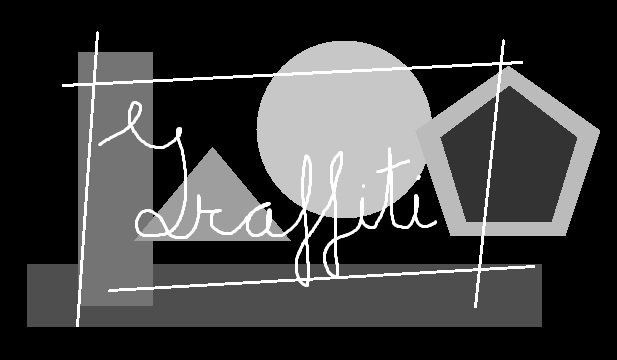

In [2]:
Im1=im.open('Original.jpg')
original=Im1.convert('L')
Im2=im.open('Graffiti.jpg')
graffiti=Im2.convert('L')
Im3=im.open('Mask.jpg')
mask=Im3.convert('L')
og=np.array(original)
gr=np.array(graffiti)
mk=np.array(mask)
graffiti

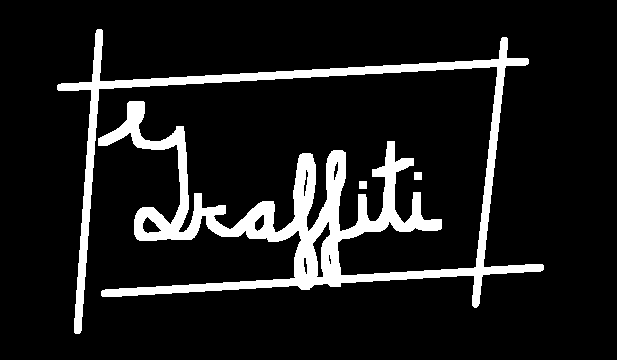

In [3]:
#prepare mask for site classification
n=mk.shape[0]
m=mk.shape[1]
inside=np.zeros((1,2))
boundary=np.zeros((1,2))
for i in range(1,n-1):
    for j in range(1,m-1):
        if mk[i][j]>230:
            mk[i][j]=255
            inside=np.vstack((inside,[i,j]))
        else:
            mk[i][j]=0
            if mk[i-1][j]>230 or mk[i+1][j]>230 or mk[i][j-1]>230 or mk[i][j+1]>230:
                boundary=np.vstack((boundary,[i,j]))
#Lattice points in the s notation are the index number in list inside
im.fromarray(mk)

In [4]:
print(boundary.shape)
print(inside.shape)
boundary=np.delete(boundary,obj=0,axis=0)
inside=np.delete(inside,obj=0,axis=0)
boundary=boundary.astype('int')
inside=inside.astype('int')
print(boundary.shape)
print(inside.shape)

(5049, 2)
(24759, 2)
(5048, 2)
(24758, 2)


In [5]:
#Initial conditions
u0=np.zeros((n,m))
stop=np.ones((n,m))
for k in range(inside.shape[0]):
    u0[inside[k][0]][inside[k][1]]=float(gr[inside[k][0]][inside[k][1]])
for k in range(boundary.shape[0]):
    u0[boundary[k][0]][boundary[k][1]]=float(gr[boundary[k][0]][boundary[k][1]])

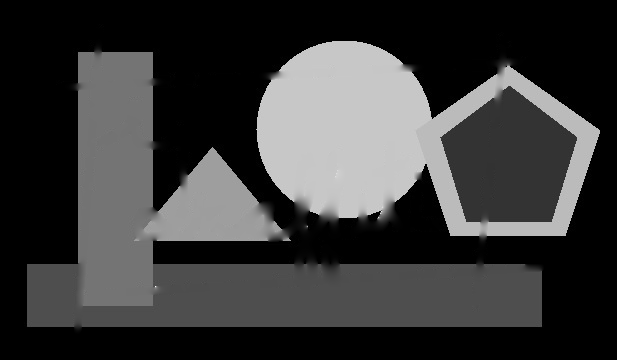

In [6]:
#Let's solve with Jacobi
u=u0
count=0
b=700
while b>0.1:
    control_u=u
    count=count+1
    for k in range(inside.shape[0]):        
        u[inside[k][0]][inside[k][1]]=(1/4)*(u[inside[k][0]-1][inside[k][1]]+u[inside[k][0]+1][inside[k][1]]+
                u[inside[k][0]][inside[k][1]-1]+u[inside[k][0]][inside[k][1]+1])
    #stop=np.subtract(u,control_u)
    #b=np.linalg.norm(stop)
    b=b-1
rs=gr
for k in range(inside.shape[0]):
    rs[inside[k][0]][inside[k][1]]=u[inside[k][0]][inside[k][1]]
restored=im.fromarray(rs)
restored

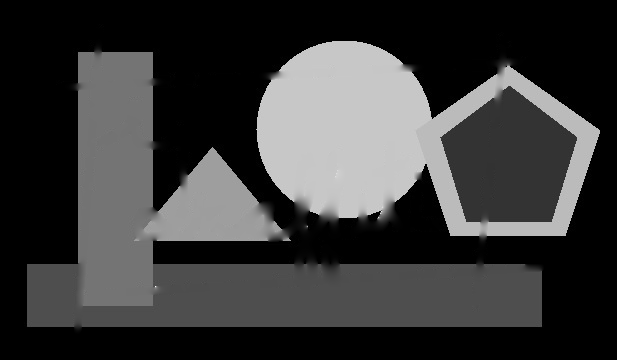

In [7]:
#Let's solve with SOR
u=u0
w=1.9
count=0
b=700
while b>0.1:
    control_u=u
    count=count+1
    for k in range(inside.shape[0]):        
        u[inside[k][0]][inside[k][1]]=(1-w)*u[inside[k][0]][inside[k][1]]+(w/4)*(u[inside[k][0]-1][inside[k][1]]+u[inside[k][0]+1][inside[k][1]]+
                u[inside[k][0]][inside[k][1]-1]+u[inside[k][0]][inside[k][1]+1])
    #stop=np.subtract(u,control_u)
    #b=np.linalg.norm(stop)
    b=b-1
rs2=gr
for k in range(inside.shape[0]):
    rs2[inside[k][0]][inside[k][1]]=u[inside[k][0]][inside[k][1]]
restored2=im.fromarray(rs2)
restored2